In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [71]:
filepath_enc = 'data/encounter-events.csv'
filepath_loit = 'data/loitering-events.csv'
filepath_ves = 'data/transshipment-vessels.csv'

In [72]:
df_enc = pd.read_csv(filepath_enc)
df_loit = pd.read_csv(filepath_loit)
df_ves = pd.read_csv(filepath_ves)

# encounter-events

In [73]:
df_enc.head()  # look at first five instance

,fishing_vessel_mmsi,transshipment_vessel_mmsi,start_time,end_time,mean_latitude,mean_longitude,duration_hr,median_distance_km,median_speed_knots
0,416565000,354240000,2016-11-18T14:30:00Z,2016-11-19T01:50:00Z,-17.039085,-79.063725,11.333333,0.038188,0.585402
1,412679190,354240000,2016-12-11T14:50:00Z,2016-12-11T19:50:00Z,-20.269608,-79.244953,5.000000,0.020033,0.575663
2,440863000,354240000,2017-06-13T12:50:00Z,2017-06-15T01:20:00Z,-62.640767,-60.690240,36.500000,0.054992,0.019775
3,416563000,354240000,2016-11-15T11:30:00Z,2016-11-16T04:00:00Z,-17.046586,-79.061923,16.500000,0.036427,1.023917
4,441309000,354240000,2017-05-19T00:40:00Z,2017-05-19T20:50:00Z,-46.627878,-60.554922,20.166667,0.034053,0.544031


First, we look at general information about the encounter dataset.

In [74]:
df_enc.info()
print('Shape: ', df_enc.shape)  # get shape of dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11681 entries, 0 to 11680
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   fishing_vessel_mmsi        11681 non-null  int64  
 1   transshipment_vessel_mmsi  11681 non-null  int64  
 2   start_time                 11681 non-null  object 
 3   end_time                   11681 non-null  object 
 4   mean_latitude              11681 non-null  float64
 5   mean_longitude             11681 non-null  float64
 6   duration_hr                11681 non-null  float64
 7   median_distance_km         11681 non-null  float64
 8   median_speed_knots         11681 non-null  float64
dtypes: float64(5), int64(2), object(2)
memory usage: 821.4+ KB
Shape:  (11681, 9)


## Null values and wrong formats

In the next step we check for the length of the mmsi value. First we have to convert values to int so that we don’t have to deal with floats and afterwards to string such that we can check its length.

In [75]:
df_enc.loc[df_enc['fishing_vessel_mmsi'].fillna(0).astype(str).str.len() < 9] # also finds NaN values

,fishing_vessel_mmsi,transshipment_vessel_mmsi,start_time,end_time,mean_latitude,mean_longitude,duration_hr,median_distance_km,median_speed_knots
1680,2001002,529844000,2016-09-04T22:50:00Z,2016-09-05T07:40:00Z,-46.718672,-60.682253,8.833333,0.068711,0.807492
1681,2001002,529844000,2016-07-23T11:00:00Z,2016-07-23T18:10:00Z,-46.280606,-60.603301,7.166667,0.070593,0.018191
1684,2000080,529844000,2016-08-05T20:20:00Z,2016-08-06T03:20:00Z,-46.569782,-60.564401,7.000000,0.046944,1.120785
2036,2000080,636017709,2017-05-08T18:20:00Z,2017-05-09T08:00:00Z,-46.226804,-60.432825,13.666667,0.041068,1.512647
2992,81561325,441032000,2017-10-18T22:30:00Z,2017-10-19T17:00:00Z,10.123826,-160.190040,18.500000,0.043220,1.080370
2993,81561325,441032000,2017-10-18T22:30:00Z,2017-10-19T17:00:00Z,10.123826,-160.190040,18.500000,0.043220,1.080370
5332,2000080,636018031,2017-07-05T00:30:00Z,2017-07-05T17:00:00Z,-46.678699,-60.728187,16.500000,0.050615,0.855092
5522,43676060,366299000,2015-08-21T07:40:00Z,2015-08-21T14:40:00Z,60.668679,-147.531834,7.000000,0.054439,0.033478
5795,36702190,366971260,2015-07-09T22:10:00Z,2015-07-10T12:40:00Z,58.735782,-157.163742,14.500000,0.118578,0.000000
10027,76000203,760000210,2017-06-02T20:40:00Z,2017-06-03T02:10:00Z,-13.467227,-76.203489,5.500000,0.141302,0.018940


In [76]:
df_enc.loc[df_enc['transshipment_vessel_mmsi'].fillna(0).astype(str).str.len() < 9] # also finds NaN values

,fishing_vessel_mmsi,transshipment_vessel_mmsi,start_time,end_time,mean_latitude,mean_longitude,duration_hr,median_distance_km,median_speed_knots


There are no missing values but some fishing_vessel_mmsi values are corrupted

## Outlier Detection

Now, we want to get some statistical information about the data distribution.

In [77]:
print(df_enc.describe())

       fishing_vessel_mmsi  transshipment_vessel_mmsi  mean_latitude  \
count         1.168100e+04               1.168100e+04   11681.000000   
mean          3.492475e+08               3.643690e+08      28.148186   
std           8.560155e+07               1.150885e+08      39.851397   
min           2.000080e+06               2.106310e+08     -64.419519   
25%           2.738125e+08               2.733859e+08      -8.003784   
50%           3.382500e+08               3.415370e+08      50.804512   
75%           4.160038e+08               4.124402e+08      58.732077   
max           9.990001e+08               7.600002e+08      78.223238   

       mean_longitude   duration_hr  median_distance_km  median_speed_knots  
count    11681.000000  11681.000000        11681.000000        11681.000000  
mean        33.759551     13.256271            0.059049            0.603595  
std        127.808306     27.669774            0.068599            0.566881  
min       -179.988139      2.000000    

Just by looking at the standard metrics, it comes to notice that in the attributes duration_hr and median_distance_km the max value seems to be very high compared to 75%-quantile.
Also, the fact that the min value in median_distance_km is 0 is worth investigating

### duration_hr
We draw a boxplot to get a better understanding of the distribution of the duration_hr column

<AxesSubplot:xlabel='duration_hr'>

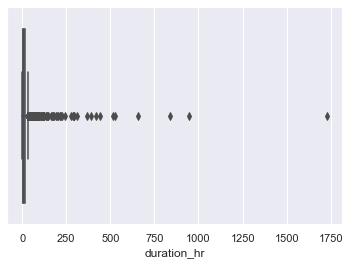

In [78]:
sns.set_theme(style="darkgrid")
sns.boxplot(x=df_enc['duration_hr'])

The number of encounters drop off rapidly with increasing duration. Let's look at how many encounters lasted longer than 65h.
Note that this value (65h) was chosen to ensure that no more than 1% of encounters have higher values. The reason for this is that we want to detect outliers. We are lacking the domain knowledge to decide whether these are still plausible transshipments or not.

In [79]:
print('{} encounters lasted longer than 65 hours'.format(df_enc.loc[df_enc['duration_hr'] > 65].shape[0]))
print('which corresponds to {:.3f}% of the available data'.format(100 * df_enc.loc[df_enc['duration_hr'] > 65].shape[0]/df_enc.shape[0]))

113 encounters lasted longer than 65 hours
which corresponds to 0.967% of the available data


At a later stage those outliers should be removed

### median_distance
Now we are going to take a closer look at the distribution of median distance of the encountering vessels

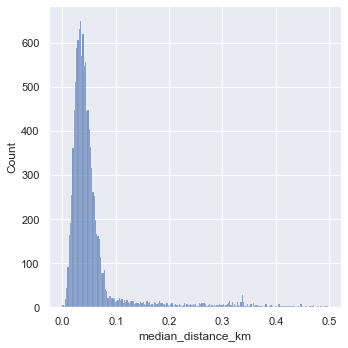

In [80]:
sns.displot(x=df_enc['median_distance_km'])

In [81]:
print('{} encounters happened under a median distance of 0 km'.format(df_enc.loc[df_enc['median_distance_km'] > 0.2].shape[0]))
print('which corresponds to {:.3f}% of the available data'.format(100 * df_enc.loc[df_enc['median_distance_km'] > 0.2].shape[0]/df_enc.shape[0]))

617 encounters happened under a median distance of 0 km
which corresponds to 5.282% of the available data


As of now, we are lacking the domain knowledge to decide whether those instances are erroneous or valid.

## Duplicates
Let's take a look at the duplicates

In [82]:
df_enc.loc[df_enc.duplicated(keep=False)]

,fishing_vessel_mmsi,transshipment_vessel_mmsi,start_time,end_time,mean_latitude,mean_longitude,duration_hr,median_distance_km,median_speed_knots
2926,367109910,356616000,2016-05-05T17:00:00Z,2016-05-06T05:50:00Z,58.945379,-160.351627,12.833333,0.050434,0.018369
2927,367109910,356616000,2016-04-19T16:50:00Z,2016-04-19T23:20:00Z,58.932539,-160.351094,6.500000,0.052085,0.011709
2928,367109910,356616000,2016-05-05T17:00:00Z,2016-05-06T05:50:00Z,58.945379,-160.351627,12.833333,0.050434,0.018369
2929,367109910,356616000,2016-04-19T16:50:00Z,2016-04-19T23:20:00Z,58.932539,-160.351094,6.500000,0.052085,0.011709
2930,367176240,356616000,2016-04-29T13:20:00Z,2016-04-29T16:30:00Z,58.948640,-160.352834,3.166667,0.042844,0.008595
...,...,...,...,...,...,...,...,...,...
8781,441050000,351747000,2015-03-07T23:20:00Z,2015-03-08T02:40:00Z,-46.584928,-60.515765,3.333333,0.025681,0.794415
8782,412694470,351747000,2014-02-12T12:50:00Z,2014-02-12T14:50:00Z,-45.363888,-60.356422,2.000000,0.056315,0.019153
8783,412694470,351747000,2014-02-12T12:50:00Z,2014-02-12T14:50:00Z,-45.363888,-60.356422,2.000000,0.056315,0.019153
8784,412326887,351747000,2015-03-18T14:50:00Z,2015-03-19T04:20:00Z,-45.611226,-60.461174,13.500000,0.052594,0.228609


E.g.: Instance 2926 and 2928 or 2927 and 2929 are clearly duplicates that should be removed from the dataset

# loitering-events

In [83]:
df_loit.info()
print('Shape: ', df_loit.shape)  # get shape of dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46569 entries, 0 to 46568
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   transshipment_mmsi    46569 non-null  int64  
 1   starting_latitude     46569 non-null  float64
 2   starting_longitude    46569 non-null  float64
 3   ending_latitude       46569 non-null  float64
 4   ending_longitude      46569 non-null  float64
 5   starting_timestamp    46569 non-null  object 
 6   ending_timestamp      46569 non-null  object 
 7   median_speed_knots    46569 non-null  float64
 8   total_event_duration  46569 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 3.2+ MB
Shape:  (46569, 9)


## Null Values and wrong formats

In [84]:
df_loit.loc[df_loit['transshipment_mmsi'].fillna(0).astype(str).str.len() < 9] # also finds NaN values in that column

SyntaxError: invalid syntax (Temp/ipykernel_2888/3632496195.py, line 1)

## Outlier detection

In [ ]:
df_loit.describe()

Again, the max value of the total_event_duration column seems far off. In the next step we are going to take a closer look at it.

### loitering duration
First, we look at a boxplot of the data

In [ ]:
sns.set_theme(style="darkgrid")
sns.boxplot(x=df_loit['total_event_duration'])

Again, we observe outliers.

In [ ]:
print('{} loitering events lasted longer than 200 hours'.format(df_loit.loc[df_loit['total_event_duration'] > 200].shape[0]))
print('which corresponds to {:.3f}% of the available data'.format(100 * df_loit.loc[df_loit['total_event_duration'] > 200].shape[0]/df_loit.shape[0]))

## Duplicates

In [ ]:
df_loit.loc[df_loit.duplicated(keep=False)]

Again, we can find many duplicates in the dataset that have to be removed at a later stage!

# Transshipment Vessels

In [ ]:
df_ves.info()
print('Shape: ', df_ves.shape)  # get shape of dataframe

## Null values and wrong formats

In the next step we check for the length of the mmsi value. First we have to convert values to int so that we don't have to deal with floats and afterwards to string such that we can check its length.

In [ ]:
df_ves.loc[df_ves['mmsi'].fillna(0).astype('int').astype(str).str.len() < 9]

## Outlier detection

In [ ]:
sns.displot(x=df_ves.mmsi)

We might remove the outliers at a later stage of the project, but we already note there existence here.

## Duplicates

In [ ]:
df_ves.loc[df_ves.duplicated(keep=False)]

No duplicates in the transshipment vessel dataset